## Setup

In [1]:
import msgpack
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import OrderedDict

from geexhp.pypsg import PSG
from geexhp.core import datamod, datavis, geostages
datavis.configure_matplotlib()

In [2]:
psg = PSG(server_url= "http://127.0.0.1:3000/api.php", timeout_seconds = 200)

Testing connection to PSG at http://127.0.0.1:3000/api.php ...
Connected to PSG with success.


In [3]:
with open("../geexhp/config/default_habex.config", "rb") as f:
    config = OrderedDict(msgpack.unpack(f, raw=False))

In [4]:
def justdoit(config, event, instrument):
    config_copy = config.copy()
    event(config_copy)
    datamod.set_instrument(config_copy, instrument)
    result = psg.run(config_copy)
    columns = ["WAVELENGTH", "ALBEDO"]
    return pd.DataFrame(result["spectrum"][:, [0, 1]], columns=columns)

## Great Oxidation Event and Neoproterozoic Oxidation Event

In [5]:
goe_data = justdoit(config, geostages.after_goe, "HWC")
modern = justdoit(config, geostages.modern_earth, "HWC")

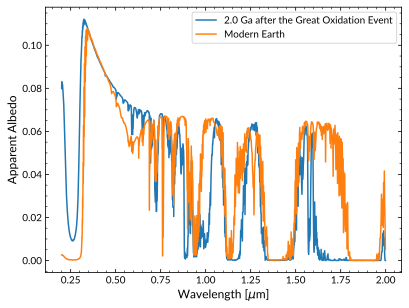

In [8]:
_, ax = plt.subplots()
datavis.plot_spectrum(goe_data, label="2.0 Ga after the Great Oxidation Event", ax=ax)
datavis.plot_spectrum(modern, label="Modern Earth", ax=ax);